## Определение перспективного тарифа для телеком компании

#### Описание проекта

Компания ***M*** является федеральным оператором сотовой связи. Клиентам компании предлагается два тарифных плана: "Smart" и "Ultra".
С целью корректировки рекламного бюджета коммерческий департамент компании хочет понять, какой тариф приносит большую выручку.

Необходимо провести предварительный анализ тарифов на основе небольшой выборки клиентов. В распоряжении имеются данные 500 пользователей компании ***M***: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Необходимо будет проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

##### Описание тарифов

*Тариф "Smart":*
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

*Тариф "Ultra":*
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

Компания ***M*** всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

In [1]:
import pandas as pd

#### Шаг 1. Открыть файл с данными и изучить общую информацию

In [2]:
# загружу первую таблицу - calls:
calls = pd.read_csv('/datasets/calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
# получу информацию о таблице:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
# загружу вторую таблицу - internet:
internet = pd.read_csv('/datasets/internet.csv')
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [5]:
# получу информацию о таблице internet:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [6]:
# загружу третью таблицу - messages:
messages = pd.read_csv('/datasets/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
# получу информацию о таблице messages:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
# загружу четвертую таблицу - tarrifs:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
# получу информацию о таблице tariffs:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [10]:
# загружу пятую таблицу - users:
users = pd.read_csv('/datasets/users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [11]:
# получу информацию о таблице users:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


#### Шаг 2. Подготовить данные

Начну с таблицы *calls*: переведу дату в формат datetime, а длительность звонков (duration) - в минуты, согласно информации:
Необходимо обратить внимание, что компания ***M*** всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
В данном случае необходимо будет выполнить округление методом ceil - до верхнего значения. Тип значений оставлю float, т.к. в дальнейшем я планирую объединять таблицы, и, в случае получения nan-значений, данные всё равно будут переведены из int обратно во float.

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

In [13]:
import numpy as np

In [14]:
calls['duration'] = np.ceil(calls['duration'])

In [15]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


In [16]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Теперь посчитаю уникальное количество звонков, чтобы определить сколько было таковых с длительностью ровно 0 минут (до перевода в int было 0.0).

In [17]:
calls['duration'].value_counts()

0.0     39613
7.0     11510
6.0     11457
5.0     11411
8.0     11272
9.0     10973
4.0     10918
3.0     10362
10.0    10186
11.0     9385
2.0      9194
12.0     8448
1.0      8402
13.0     7486
14.0     6554
15.0     5505
16.0     4551
17.0     3671
18.0     2984
19.0     2411
20.0     1806
21.0     1304
22.0      975
23.0      720
24.0      468
25.0      363
26.0      257
27.0      151
28.0      104
29.0       56
30.0       39
31.0       30
32.0       17
33.0       10
35.0        5
34.0        3
38.0        2
36.0        2
37.0        2
Name: duration, dtype: int64

Как выяснилось, было совершено 39613 таких звонков - это самое большое количество из всех звонков. В общем, немного изучив в интернете вопрос о том, почему такие данные выгружаются, пришёл к выводу, что есть несколько причин для появления таких значений: отсутствие соединения при наборе, "абонент занят/разговаривает", срыв звонка, отмена звонка после первого (нескольких) гудка(-ов). То есть, скорее всего, звонок попросту несостоялся, но так как номер был набран, то сам факт звонка уже был зафиксирован в базе.
Считаю, что строки с такими звонками лучше вообще не брать в расчет, т.к. они лишь будут мешать верно рассчитывать все дальнейшие показатели. Чтобы убедиться в том, что строки с 0-значениями можно удалить, попробую сгруппировать данные по user_id и посчитать сумму минут всех их разговоров. Если нулевых сумм не будет, это означет, что абсолютно все изучаемые пользователи сотовой связи имеюи данные по реально совершенным звонкам, а 0-значения не несут никакой аналитической ценности и могут быть удалены.

In [18]:
calls_grouped = calls.groupby('user_id').sum()
calls_grouped.sort_values(by='duration')

,duration
user_id,
1257,66.0
1016,122.0
1373,136.0
1442,192.0
1141,211.0
...,...
1196,8690.0
1453,10269.0
1375,11398.0


Получил данные, согласно которым минимальное количество потраченных минут - 66. Следовательно, 0-значения длительности звонков не имеют никакого смысла для дальнейшего изучения данных, и от них следует избавиться. Сделаю выборку из датасета, без длительности звонков, равных 0.

In [19]:
better_calls = calls.query('duration > 0').reset_index(drop=True)
better_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162994 entries, 0 to 162993
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null float64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.0+ MB


In [20]:
better_calls.head()

,id,call_date,duration,user_id
0,1000_2,2018-06-11,3.0,1000
1,1000_3,2018-09-21,14.0,1000
2,1000_4,2018-12-15,6.0,1000
3,1000_7,2018-08-22,19.0,1000
4,1000_8,2018-09-15,19.0,1000


Займусь предобработкой данных во второй таблице - *internet* - также переведу дату в формат datetime, а количество израсходованных мегабайт округлю до верхних значений. И не буду приводить их к целочисленным значениям, так как впоследствии я буду объединять таблицы, и если появятся строки с nan-значениями при объединении (допустим, будут месяцы, когда конкретный пользователь пользовался только звонками, но не интернетом), то они всё равно переведутся в тип float.

In [21]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['mb_used'] = np.ceil(internet['mb_used'])

In [22]:
# Так же, как в calls, проверю наличие 0-значений использованного трафика:
internet['mb_used'].value_counts()

0.0       19598
333.0       231
382.0       228
377.0       224
253.0       222
          ...  
1308.0        1
1456.0        1
1375.0        1
1364.0        1
1291.0        1
Name: mb_used, Length: 1424, dtype: int64

In [23]:
internet_grouped = internet.groupby('user_id').sum()
internet_grouped.sort_values(by='mb_used')

,mb_used
user_id,
1399,4608.0
1192,9044.0
1062,11090.0
1069,11367.0
1406,11446.0
...,...
1330,336694.0
1185,343845.0
1180,348532.0


Тут аналогичная ситуация: при суммировании израсходованного трафика по пользователям, нулевых значений не обнаружено. Соответственно, можно также предположить, что все 0-значения - это факт, когда подключение к сети срабатывало, но реального трафика не было. От этих значений я также решил избавиться, сделав выборку без них

In [24]:
better_internet = internet.query('mb_used > 0').reset_index(drop=True)
better_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129798 entries, 0 to 129797
Data columns (total 4 columns):
id              129798 non-null object
mb_used         129798 non-null float64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.0+ MB


In [25]:
# В третьей таблице messages мне нужно только перевести дату отправки сообщений в формат datetime:
messages['message_date'] = pd.to_datetime(messages['message_date'])

В таблице *tariffs* предобработка не нужна, т.к. все типы данных верные. И это лишь информационная таблица с расценками по тарифам и включенным пакетам.
В таблице *users* необходимо перевести оба столбца с датами в формат datetime.

In [26]:
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Так как информация об имени и фамилии пользователей не несёт для данного анализа никакого смысла, то считаю целесообразным от двух этих столбцов вообще избавиться. Тем более, что когда я буду объединять данные таблиц, то неплохо бы минимизировать количество столбцов. И еще переименую столбец tariff в tariff_name.

In [27]:
better_users = users.drop(columns=['first_name', 'last_name'])
better_users.columns = ['user_id', 'age', 'churn_date', 'city', 'reg_date', 'tariff_name']
better_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
user_id        500 non-null int64
age            500 non-null int64
churn_date     38 non-null datetime64[ns]
city           500 non-null object
reg_date       500 non-null datetime64[ns]
tariff_name    500 non-null object
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 23.6+ KB


Теперь я добавлю в таблицы *better_calls*, *better_internet*, *messages* по одинаковому столбцу - месяц (month), согласно датам пользования услугами сотовой связи, чтобы потом я смог сгруппировать данные этих 3-х таблиц по пользователям (user_id) и по месяцам.

In [28]:
better_calls['month'] = better_calls['call_date'].dt.month

In [29]:
better_internet['month'] = better_internet['session_date'].dt.month

In [30]:
messages['month'] = messages['message_date'].dt.month

И составлю теперь сводную таблицу *calls_grouped*, в которой сгруппирую значения количества звонков и суммарную длительность звонков по каждому пользователю в разрезе по месяцам

In [31]:
calls_grouped = better_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])

In [32]:
calls_grouped

count      sum
              duration duration
user_id month                  
1000    5           17    159.0
        6           28    172.0
        7           41    340.0
        8           42    408.0
        9           46    466.0
...                ...      ...
1498    10          30    247.0
1499    9            8     70.0
        10          44    449.0
        11          62    612.0
        12          56    492.0

[3168 rows x 2 columns]

##### Посчитать для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;

In [33]:
calls_grouped = calls_grouped.reset_index()

In [34]:
# Для лучшей наглядности переименую столбцы, чтобы убрать разноуровневую структуру названий:
calls_grouped.columns = ['user_id', 'month', 'calls_number', 'calls_duration']
calls_grouped

,user_id,month,calls_number,calls_duration
0,1000,5,17,159.0
1,1000,6,28,172.0
2,1000,7,41,340.0
3,1000,8,42,408.0
4,1000,9,46,466.0
...,...,...,...,...
3163,1498,10,30,247.0
3164,1499,9,8,70.0
3165,1499,10,44,449.0
3166,1499,11,62,612.0


##### Посчитать для каждого пользователя:
* объем израсходованного интернет-трафика по месяцам;

Сделаю то же самое с таблицей *better_internet* - сгруппирую их по user_id и по месяцам.

In [35]:
internet_grouped = better_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_grouped

mb_used
user_id month         
1000    5       2256.0
        6      23257.0
        7      14016.0
        8      14070.0
        9      14581.0
...                ...
1498    10     20604.0
1499    9       1848.0
        10     17809.0
        11     17984.0
        12     13077.0

[3201 rows x 1 columns]

In [36]:
# Также переименую столбцы, чтобы убрать разноуровневую структуру названий:
internet_grouped = internet_grouped.reset_index()
internet_grouped.columns = ['user_id', 'month', 'mb_used_sum']
internet_grouped

,user_id,month,mb_used_sum
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0
...,...,...,...
3196,1498,10,20604.0
3197,1499,9,1848.0
3198,1499,10,17809.0
3199,1499,11,17984.0


А теперь самый важный момент - объединю сгруппированные таблицы - впоследствии будет легче работать с одним большим датасетом, позволяющим рассчитывать все необходимые показатели по каждому из юзеров, в разрезе каждого месяца.

In [37]:
internet_calls = internet_grouped.merge(calls_grouped, on=['user_id', 'month'], how='left')
internet_calls

,user_id,month,mb_used_sum,calls_number,calls_duration
0,1000,5,2256.0,17.0,159.0
1,1000,6,23257.0,28.0,172.0
2,1000,7,14016.0,41.0,340.0
3,1000,8,14070.0,42.0,408.0
4,1000,9,14581.0,46.0,466.0
...,...,...,...,...,...
3196,1498,10,20604.0,30.0,247.0
3197,1499,9,1848.0,8.0,70.0
3198,1499,10,17809.0,44.0,449.0
3199,1499,11,17984.0,62.0,612.0


##### Посчитать для каждого пользователя:
* количество отправленных сообщений по месяцам;

Для данного расчета тоже сгруппирую данные таблицы messages по пользователям и месяцам

In [38]:
messages_grouped = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
messages_grouped

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
...            ..
1498    10     42
1499    9      11
        10     48
        11     59
        12     66

[2717 rows x 1 columns]

In [39]:
# Переименую столбцы, чтобы убрать разноуровневую структуру названий:
messages_grouped = messages_grouped.reset_index()
messages_grouped.columns = ['user_id', 'month', 'messages_sent']
messages_grouped

,user_id,month,messages_sent
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


И присоединю полученную таблицу к *internet_calls*, создав новую таблицу *network* - соединение по столбцам user_id и month.

In [40]:
network = internet_calls.merge(messages_grouped, on=['user_id', 'month'], how='left')
network.head()

,user_id,month,mb_used_sum,calls_number,calls_duration,messages_sent
0,1000,5,2256.0,17.0,159.0,22.0
1,1000,6,23257.0,28.0,172.0,60.0
2,1000,7,14016.0,41.0,340.0,75.0
3,1000,8,14070.0,42.0,408.0,81.0
4,1000,9,14581.0,46.0,466.0,57.0


In [41]:
# И добавлю данные из таблицы users к network, создав таблицу network_users:
network_users = network.merge(better_users, on='user_id', how='left')
network_users.head()

,user_id,month,mb_used_sum,calls_number,calls_duration,messages_sent,age,churn_date,city,reg_date,tariff_name
0,1000,5,2256.0,17.0,159.0,22.0,52,NaT,Краснодар,2018-05-25,ultra
1,1000,6,23257.0,28.0,172.0,60.0,52,NaT,Краснодар,2018-05-25,ultra
2,1000,7,14016.0,41.0,340.0,75.0,52,NaT,Краснодар,2018-05-25,ultra
3,1000,8,14070.0,42.0,408.0,81.0,52,NaT,Краснодар,2018-05-25,ultra
4,1000,9,14581.0,46.0,466.0,57.0,52,NaT,Краснодар,2018-05-25,ultra


Создам финальный датафрейм - ***final_df*** - в который добавлю и всю информацию по тарифам и их содержанию. После чего смогу приступить ко всем необходимым расчетам.

In [42]:
final_df = network_users.merge(tariffs, on='tariff_name', how='left')
final_df

,user_id,month,mb_used_sum,calls_number,calls_duration,messages_sent,age,churn_date,city,reg_date,tariff_name,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,2256.0,17.0,159.0,22.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,23257.0,28.0,172.0,60.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,14016.0,41.0,340.0,75.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,14070.0,42.0,408.0,81.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,14581.0,46.0,466.0,57.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,1498,10,20604.0,30.0,247.0,42.0,68,2018-10-25,Владикавказ,2018-07-19,smart,50,15360,500,550,200,3,3
3197,1499,9,1848.0,8.0,70.0,11.0,35,NaT,Пермь,2018-09-27,smart,50,15360,500,550,200,3,3
3198,1499,10,17809.0,44.0,449.0,48.0,35,NaT,Пермь,2018-09-27,smart,50,15360,500,550,200,3,3
3199,1499,11,17984.0,62.0,612.0,59.0,35,NaT,Пермь,2018-09-27,smart,50,15360,500,550,200,3,3


##### Посчитать для каждого пользователя:
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Расчет произведу в созданном списке monthly_revenue_list, куда в цикле занесу все перечисленные действия. А затем передам полученные значения этого списка в новый столбец monthly_revenue.

In [43]:
monthly_revenue_list = []
revenue = 0
for i in range(len(final_df)):
    revenue = final_df['rub_monthly_fee'][i]
    if (final_df['messages_included'][i] - final_df['messages_sent'][i]) < 0:
        revenue += (final_df['messages_included'][i] - final_df['messages_sent'][i]) * (-1) * final_df['rub_per_message'][i]
    if (final_df['mg_per_month_included'][i] - final_df['mb_used_sum'][i]) < 0:
        revenue += (final_df['mg_per_month_included'][i] - final_df['mb_used_sum'][i]) * (-1) / 1000 * final_df['rub_per_gb'][i]
    if (final_df['minutes_included'][i] - final_df['calls_duration'][i]) < 0:
        revenue += (final_df['minutes_included'][i] - final_df['calls_duration'][i]) * (-1) * final_df['rub_per_minute'][i]
    monthly_revenue_list.append(round(revenue, 2))

In [44]:
print(len(monthly_revenue_list))

3201


In [45]:
final_df['monthly_revenue'] = pd.Series(monthly_revenue_list)

In [46]:
final_df

,user_id,month,mb_used_sum,calls_number,calls_duration,messages_sent,age,churn_date,city,reg_date,tariff_name,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue
0,1000,5,2256.0,17.0,159.0,22.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,23257.0,28.0,172.0,60.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,14016.0,41.0,340.0,75.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,14070.0,42.0,408.0,81.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,14581.0,46.0,466.0,57.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,1498,10,20604.0,30.0,247.0,42.0,68,2018-10-25,Владикавказ,2018-07-19,smart,50,15360,500,550,200,3,3,1598.8
3197,1499,9,1848.0,8.0,70.0,11.0,35,NaT,Пермь,2018-09-27,smart,50,15360,500,550,200,3,3,550.0
3198,1499,10,17809.0,44.0,449.0,48.0,35,NaT,Пермь,2018-09-27,smart,50,15360,500,550,200,3,3,1039.8
3199,1499,11,17984.0,62.0,612.0,59.0,35,NaT,Пермь,2018-09-27,smart,50,15360,500,550,200,3,3,1437.8


#### Шаг 3. Проанализировать данные
Необходимо описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

In [47]:
# Разделю датасет на два - по тарифам - чтобы затем можно было проще оценить все показатели и проверять гипотезы.
smart_df = final_df[final_df['tariff_name'] == 'smart']
ultra_df = final_df[final_df['tariff_name'] == 'ultra']

In [48]:
# Посчитаю средние по 3-м показателям для обоих тарифов:
smart_calls_mean = round(smart_df['calls_duration'].mean(), 2)
smart_internet_mean = round(smart_df['mb_used_sum'].mean() / 1000, 2)
smart_messages_mean = round(smart_df['messages_sent'].mean())
ultra_calls_mean = round(ultra_df['calls_duration'].mean(), 2)
ultra_internet_mean = round(ultra_df['mb_used_sum'].mean() / 1000, 2)
ultra_messages_mean = round(ultra_df['messages_sent'].mean())

indexes_mean = ['Среднее кол-во минут', 'Среднее кол-во гигабайт', 'Среднее кол-во сообщений']
columns_mean = ['smart', 'ultra']
mean_list = [[smart_calls_mean, ultra_calls_mean], [smart_internet_mean, ultra_internet_mean], [smart_messages_mean, ultra_messages_mean]]
mean_compare = pd.DataFrame(data=mean_list, columns=columns_mean, index=indexes_mean)
mean_compare

,smart,ultra
Среднее кол-во минут,419.78,551.71
Среднее кол-во гигабайт,16.24,19.71
Среднее кол-во сообщений,39.00,62.00


Посчитаю дисперсии по всем 3-м показателям для обоих тарифов. Так как исследуется не вся совокупность, а ее выборка (данные только 500 абонентов оператора), то при расчете дисперсии будет добавлен параметр ddof=1.

In [49]:
smart_calls_var = np.var(smart_df['calls_duration'], ddof=1)
smart_internet_var = np.var((smart_df['mb_used_sum'] / 1000), ddof=1)
smart_messages_var = np.var(smart_df['messages_sent'], ddof=1)
ultra_calls_var = np.var(ultra_df['calls_duration'], ddof=1)
ultra_internet_var = np.var((ultra_df['mb_used_sum'] / 1000), ddof=1)
ultra_messages_var = np.var(ultra_df['messages_sent'], ddof=1)

indexes_var = ['Дисперсия минут', 'Дисперсия гигабайт', 'Дисперсия сообщений']
columns_var = ['smart', 'ultra']
var_list = [[smart_calls_var, ultra_calls_var], [smart_internet_var, ultra_internet_var], [smart_messages_var, ultra_messages_var]]
variance_compare = pd.DataFrame(data=var_list, columns=columns_var, index=indexes_var)
variance_compare

,smart,ultra
Дисперсия минут,35624.797625,93012.491310
Дисперсия гигабайт,34.340092,98.746499
Дисперсия сообщений,716.857966,2118.017149


In [50]:
# Раз дисперсии уже известны, то посчитаю стандартное отклонение путём извлечения корня из значений дисперсии:
smart_calls_std = np.sqrt(smart_calls_var)
smart_internet_std = np.sqrt(smart_internet_var)
smart_messages_std = np.sqrt(smart_messages_var)
ultra_calls_std = np.sqrt(ultra_calls_var)
ultra_internet_std = np.sqrt(ultra_internet_var)
ultra_messages_std = np.sqrt(ultra_messages_var)

indexes_std = ['Стандартное отклонение для минут', 'Стандартное отклонение для гигабайт', 'Стандартное отклонение для сообщений']
columns_std = ['smart', 'ultra']
std_list = [[smart_calls_std, ultra_calls_std], [smart_internet_std, ultra_internet_std], [smart_messages_std, ultra_messages_std]]
std_compare = pd.DataFrame(data=std_list, columns=columns_std, index=indexes_std)
std_compare

,smart,ultra
Стандартное отклонение для минут,188.745325,304.979493
Стандартное отклонение для гигабайт,5.860042,9.937127
Стандартное отклонение для сообщений,26.774203,46.021920


Теперь построю гистограммы сразу по 3-м исследуемым параметрам, сгруппированным по пользователям, но по отдельности для каждого из тарифов

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3baf2944d0>,
      dtype=object)

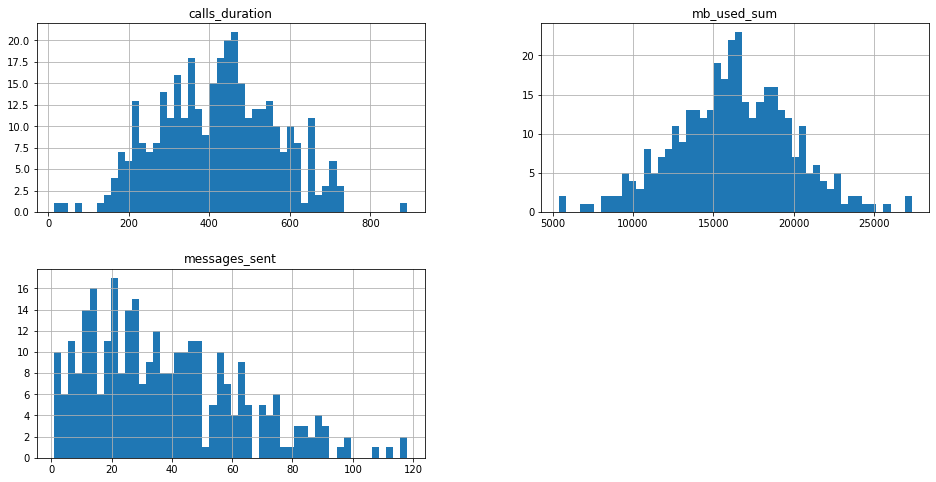

In [51]:
smart_df.pivot_table(index='user_id', values=['calls_duration', 'mb_used_sum', 'messages_sent']).hist(bins=50, figsize=(16,8))

Распределения по минутам и трафику интернета, судя по формам гистограм, можно отнести к нормальным. Проверю это положение правилом трёх сигм

In [52]:
smart_calls_bottom = smart_calls_mean - 3 * smart_calls_std
smart_calls_top = smart_calls_mean + 3 * smart_calls_std
smart_internet_bottom = smart_internet_mean - 3 * smart_internet_std
smart_internet_top = smart_internet_mean + 3 * smart_internet_std
smart_messages_bottom = smart_messages_mean - 3 * smart_messages_std
smart_messages_top = smart_messages_mean + 3 * smart_messages_std

indexes_distr_smart = ['Интервал для минут', 'Интервал для гигабайт', 'Интервал для сообщений']
columns_distr_smart = ['bottom_line', 'top_line']
distr_smart_list = [[smart_calls_bottom, smart_calls_top], [smart_internet_bottom, smart_internet_top], [smart_messages_bottom, smart_messages_top]]
distr_smart = pd.DataFrame(data=distr_smart_list, columns=columns_distr_smart, index=indexes_distr_smart)
distr_smart

,bottom_line,top_line
Интервал для минут,-146.455974,986.015974
Интервал для гигабайт,-1.340126,33.820126
Интервал для сообщений,-41.322610,119.322610


Все (~99%) значения изучаемых 3-х параметров попадают в описанные интервалы их распределения. Гистограммы подтверждают этот факт наглядно. Однако у параметра "количество сообщений" разброс значений отличается, и среднее значение существенно сдвинуто влево относительно достаточно большой плотности значений в правой части графика. Думаю, это связано с неравномерностью использования сообщений как таковых среди пользователей сотовой связи в наши дни: кто-то этой услугой практически перестал пользоваться (ввиду наличия мессенджеров, с нетарифицируемой отправкой сообщений через интернет), а кто-то, если и использует эту услугу, то использует в больших количествах.
Посчитаю еще медианное значение этого параметра. Возможно, оно ближе к реальности отразит меру центральной тенденции.

In [53]:
smart_messages_median = smart_df['messages_sent'].median()
print(smart_messages_median)

34.0


Медиана оказалась даже еще "левее" в своём значении, чем среднее. Поэтому оставлю в основных данных анализа всё же среднее значение, воспользовавшись сделанным выше предположением относительно использования услуги смс в 2018 г.

Построю гистограммы для изучаемых параметров для тарифа ultra

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bad148450>,
      dtype=object)

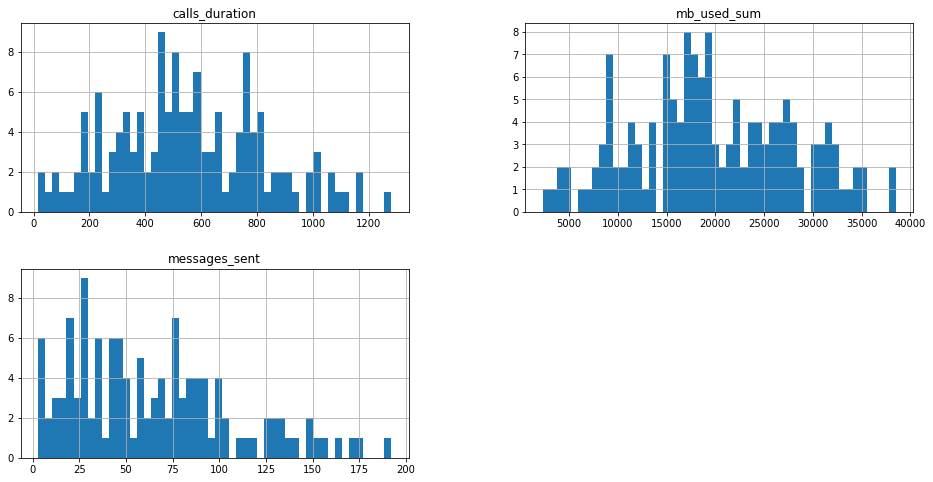

In [54]:
ultra_df.pivot_table(index='user_id', values=['calls_duration', 'mb_used_sum', 'messages_sent']).hist(bins=50, figsize=(16,8))

In [55]:
ultra_calls_bottom = ultra_calls_mean - 3 * ultra_calls_std
ultra_calls_top = ultra_calls_mean + 3 * ultra_calls_std
ultra_internet_bottom = ultra_internet_mean - 3 * ultra_internet_std
ultra_internet_top = ultra_internet_mean + 3 * ultra_internet_std
ultra_messages_bottom = ultra_messages_mean - 3 * ultra_messages_std
ultra_messages_top = ultra_messages_mean + 3 * ultra_messages_std

indexes_distr_ultra = ['Интервал для минут', 'Интервал для гигабайт', 'Интервал для сообщений']
columns_distr_ultra = ['bottom_line', 'top_line']
distr_ultra_list = [[ultra_calls_bottom, ultra_calls_top], [ultra_internet_bottom, ultra_internet_top], [ultra_messages_bottom, ultra_messages_top]]
distr_ultra = pd.DataFrame(data=distr_ultra_list, columns=columns_distr_ultra, index=indexes_distr_ultra)
distr_ultra

,bottom_line,top_line
Интервал для минут,-363.228480,1466.648480
Интервал для гигабайт,-10.101382,49.521382
Интервал для сообщений,-76.065761,200.065761


Так как тариф "Ultra" подразумевает более интенсивное использование звонков и интернет-трафика, то и их разброс получился более "амплитудным". Но если, например, уменьшить количество корзин распределения значений, то картинка будет больше похожа на ситуацию с тарифом "Smart".
Ситуация с отправляемыми сообщениями - максимально схожа с тем, что было видно в тарифе "Smart".

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3baa03a0d0>,
      dtype=object)

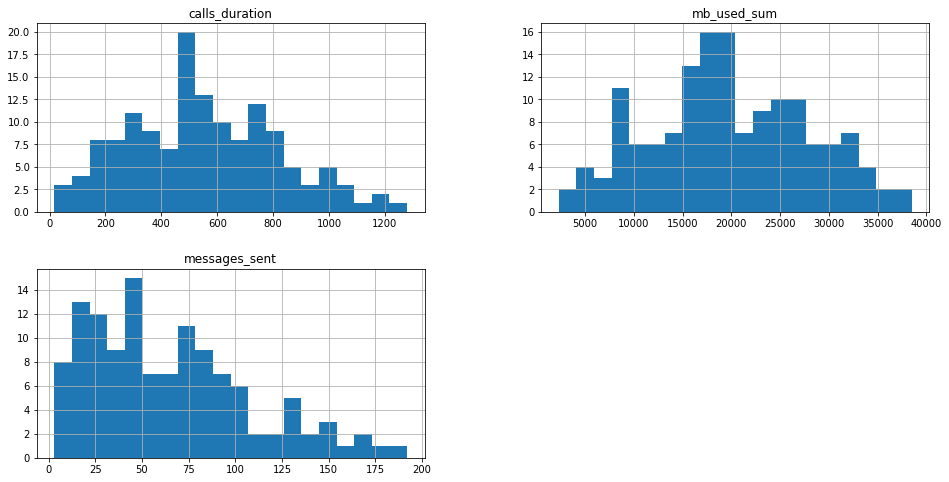

In [56]:
ultra_df.pivot_table(index='user_id', values=['calls_duration', 'mb_used_sum', 'messages_sent']).hist(bins=20, figsize=(16,8))

#### Шаг 4. Проверка гипотез

In [57]:
from scipy import stats as st

* средняя выручка пользователей тарифов "Ultra" и "Smart" различается;

Так как оцениваться будет выручка в разрезе тарифов Смарт и Ультра по отдельности, то проверю количество значений в каждой из совокупностей.

In [58]:
print('Количество значений по тарифу Смарт:', len(smart_df['monthly_revenue']))
print('Количество значений по тарифу Ультра:', len(ultra_df['monthly_revenue']))

Количество значений по тарифу Смарт: 2227
Количество значений по тарифу Ультра: 974


Количества измеряемых значений по каждому из тарифов не совпадают. Поэтому применить Гипотезу для зависимых (парных) выборок не получится.
Следовательно, в данном случае применю Гипотезу о равенстве средних двух генеральных совокупностей, считая, что значения по каждому из тарифов и представляют собой в отдельности генеральные совокупности.

Приму в качестве нулевой гипотезы положение о том, что средняя выручка по 2-м тарифам равна. 

In [59]:
# Выделю исследуемые совокупности в отдельные переменные - smart_revenue и ultra_revenue
# критические уровень статистической значимости (alpa) приму за 0.05.
# Если p-value окажется меньше него - нулевая гипотеза будет отвергнута

smart_revenue = smart_df['monthly_revenue']
ultra_revenue = ultra_df['monthly_revenue']

alpha = 0.05

results = st.ttest_ind(smart_revenue, ultra_revenue)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.0608632443775105e-178
Отвергаем нулевую гипотезу


Полученное значение p-value настолько мало, что можно смело сделать вывод о значимом различии средних показателей выручки по двум исследуемым тарифам. Т.е. нулевая гипотеза (о том, что средние равны) отвергается наверняка.
Соответственно, будет правильнее утверждать о том, что альтернативная гипотеза - о том, что средняя выручка по тарифам будет отличаться - может быть возможна.

In [60]:
print(smart_df['monthly_revenue'].mean())
print(ultra_df['monthly_revenue'].mean())

1246.962011674899
2064.460934291581


Даже при простой проверке средних значений видно, что средняя выручка у тарифа Ultra примерно в 1.65 раза выше средней выручки по тарифу Smart. Это касается проверки по исследуемой выборки клиентов компании (500 человек).

* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

In [61]:
# Разделю датасет на 2 выборки - с информацией по пользователям из Москвы и не из Москвы:
moscow_df = final_df[final_df['city'] == 'Москва']
regions_df = final_df[final_df['city'] != 'Москва']

print(len(moscow_df))
print(len(regions_df))

611
2590


Так как количества пользователей из Москвы и из других городов/регионов не совпадают, опять же, применить Гипотезу для зависимых (парных) выборок не получится.
Следовательно, в данном случае также использую Гипотезу о равенстве средних двух генеральных совокупностей, считая, что значения по каждому из выбранных регионов (Москва и НЕ-Москва) и представляют собой в отдельности генеральные совокупности.

Приму в качестве нулевой гипотезы положение о том, что средняя выручка по пользователям из Москвы и НЕ из Москвы совпадает. 

In [62]:
# Выделю исследуемые совокупности в отдельные переменные - moscow_revenue и regions_revenue
# критические уровень статистической значимости (alpa) приму за 0.05.
# Если p-value окажется меньше него - нулевая гипотеза будет отвергнута

moscow_revenue = moscow_df['monthly_revenue']
regions_revenue = regions_df['monthly_revenue']

alpha = 0.05

results2 = st.ttest_ind(moscow_revenue, regions_revenue)

print('p-значение:', results2.pvalue)

if results2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.48521124320582887
Не получилось отвергнуть нулевую гипотезу


В ответе на второй вопрос выяснилось, что p-значение настолько велико, что означает, что с вероятностью >48% различие в показателях средней выручки по абонента в Москве и не в Москве может получиться случайно. Вероятность очень высока для того, чтобы нулевая гипотеза могла быть отвергнута. Соответственно, оставляю в качестве вывода именно ее - о том, что средняя выручка по абонентам из Москвы и из регионов, скорее всего, будет совпадать.
Заодно проверю эти значения в исследуемых выборках.

In [63]:
print(moscow_df['monthly_revenue'].mean())
print(regions_df['monthly_revenue'].mean())

1515.902782324059
1490.9470077220078


Значения средней выручке максимально близки друг к другу.
Поэтому альтернативную гипотезу (об их различии принять невозможно).

### Шаг 5. Общий вывод

1. Файлы 5-ти исследуемых таблиц были открыты, информация по ним изучена;
2. Подготовка / предобработка данных:
    - В таблице calls столбец с информацией о датах был переведен в формат datetime, а длительность звонков (duration) - в минуты, согласно информации из условия, путём применения метода округления значений ceil - до верхнего значения. Тип значений был оставлен float; нулевые значения по звонкам были удалены из ислледуемого датасета;
    - во второй таблице - internet - даты также были переведены в формат datetime, а количество израсходованных мегабайт округлены до верхних значений; от нулевых значений по трафику было решено избавиться;
    - В таблице tariffs предобработка не была нужна, т.к. все типы данных оказались верными. В таблице users оба столбца с датами были переведены в формат datetime;
    - в итоговой части подготовки данных информация из всех 5-ти таблиц была объединена в одну большую таблицу final_df, в которой данные по звонкам, интернет-трафику и сообщениям была сгруппирована по пользователям и месяцам, а столбцы с лишней (для данного анализа) информацией (фамилия, имя и возраст пользователей) были опущены.
    Также были рассчитаны следующие показатели - в разрезе пользователей и по месяцам:
    * количество сделанных звонков и израсходованных минут разговора по месяцам;
    * количество отправленных сообщений по месяцам;
    * объем израсходованного интернет-трафика по месяцам;
    * помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).
    
3. Для следующего вида анализа датафрейм final_df был поделён на два - в зависимости от исследуемого тарифа - smart и ultra. По каждому из них были получены следующие значения исследуемых параметров:

    СМАРТ: Среднее кол-во минут - 419.78, Среднее кол-во гигабайт - 16.24, Среднее кол-во сообщений - 39.00, Дисперсия минут - 35624.797625, Дисперсия гигабайт - 34.340092, Дисперсия сообщений - 716.857966, Стандартное отклонение для минут - 188.745325, Стандартное отклонение для гигабайт - 5.860042, Стандартное отклонение для сообщений - 26.77420;
    
    УЛЬТРА: Среднее кол-во минут - 551.71, Среднее кол-во гигабайт - 19.71, Среднее кол-во сообщений - 62.00, Дисперсия минут - 93012.491310, Дисперсия гигабайт - 98.746499, Дисперсия сообщений - 2118.017149, Стандартное отклонение для минут - 304.979493, Стандартное отклонение для гигабайт - 9.937127, Стандартное отклонение для сообщений - 46.021920;

    Все (~99%) значения изучаемых 3-х параметров попали в описанные интервалы их распределения. Гистограммы подтвердили этот факт наглядно. Однако у параметра "количество сообщений" разброс значений отличается, и среднее значение существенно сдвинуто влево относительно достаточно большой плотности значений в правой части графика. Было сделано предположение, это связано с неравномерностью использования сообщений как таковых среди пользователей сотовой связи в наши дни: кто-то этой услугой практически перестал пользоваться (ввиду наличия мессенджеров, с нетарифицируемой отправкой сообщений через интернет), а кто-то, если и использует эту услугу, то использует в больших количествах.
    Распределение значений принято как нормальное.


4. Было выдвинуто и проверено 2 альтернативные гипотезы:
    * средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
    Полученное значение p-value (2.0608632443775105e-178) оказалось настолько малым, что можно смело сделать вывод о значимом различии средних показателей выручки по двум исследуемым тарифам. Т.е. нулевая гипотеза (о том, что средние равны) отвергается наверняка.
    Соответственно, будет правильнее утверждать о том, что альтернативная гипотеза - о том, что средняя выручка по тарифам будет отличаться - может быть возможна.
    * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
    В ответе на второй вопрос выяснилось, что p-значение (0.48521124320582887) настолько велико, что означает, что с вероятностью >48% различие в показателях средней выручки по абонента в Москве и не в Москве может получиться случайно. Вероятность очень высока для того, чтобы нулевая гипотеза могла быть отвергнута. Соответственно, в качестве вывода была оставлена именно она (нулевая гипотеза) - о том, что средняя выручка по абонентам из Москвы и из регионов, скорее всего, будет совпадать.